## Department of Computer Science, University of York
### DATA: Introduction to Data Science

## Task 1: Domain Analysis  (5 marks)

Given the business domain and the data overview presented (in the assessment paper), provide a brief description of

* the business problem and its significance to the relevant sector;
* the link between the business problem and the field of data science;
* the main areas of investigation; and
* potential ideas and solutions.


**Word Limit:** 300 words

**Write your answer here (text cell(s) to be used, as appropriate)**

The questions at hand are of demographics, loan default prediction, and expansion area. Banks like this one make profit from interest on loans and credit cards[^1], so the objectives are to refuse loans that will default, give high-value customers reasons to continue doing business with the bank, and onboard new customers.

We can leverage data science to load and quickly perform operations on huge amounts of figures and categorical data (e.g. over 100,000 rows of transactions), creating descriptions and visualisations of the data that people can understand. We can inform decision making by using techniques from statistics to summarise business operations and make predictions of the outcomes of providing credit.

The investigations I have chosen to carry out will be the coverage of the customer base over different cities, and the way a customer's characteristics and prior usage of services relate to credit outcomes. Proposals will include strategies for predicting whether to authorise products, how to identify customers to target with perks, and potential geographic areas of expansion to focus on, using models like logistic regression and visualisation like bar charts.

[^1]: https://www.investopedia.com/terms/c/commercialbank.asp

In [7]:
### Write your answer here (code cell(s) to be used, as appropriate)



----
----


## Task 2: Database Design (25 marks)


Having understood the business domain, present a conceptual design in the form of an entity-relationship (ER) model that would be helpful in creating a database for the bank.

The bank data currently exists in the form of a csv file called *BankRecords.csv*, provided on VLE (path given in page 5, assessment paper). This file has all the existing records. The table available in the csv file is unnormalised. The information about its different columns is given in Tables 1 and 2 (in the assessment paper).

Following the standard principles of database normalisation, normalise the given table (*BankRecords.csv*) to a database schema that has minimum redundancies. Then, using the designed schema, create an SQLite database.

Your answer should include the SQL statements needed to accomplish this step. Your submission should also include the created SQLite database file.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* The designated keys, existing relationships, and identified functional dependencies;
* The steps followed and justifications for the decisions made.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code/SQL statements or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

# Normal form

The data is already in first normal form as there are no composite values, so we can continue to 2NF.

This table is clearly not in second normal form. Loan date is dependent on loan ID, name is dependent on client ID, etc. etc. There are a bunch of values that should be primary keys all in the same table. I split up the dataset into eight separate tables intuitively based on the "Data Overview" and "Description of columns" from the specification. Each unique ID gets its own table.

Now in 2NF, I noticed noticed a transitive dependency - I had included dispID, clientID, and accountID together in their relevant tables. I realised clientID and accountID are both just dependent on dispID. Therefore I removed them from all the tables except Dispositon. Finally, we are in third normal form and finished.

I briefly thought there was a transitive dependency from "region" to "noAreas" because the data overview said noAreas was the number of *cities* in the *region*, and was repeated for each *city*, but the inconsistent noAreas for each region and the mismatch of actual city count implies this is an error in the data overview.

Reference:
- DATA-Lecture4-DatabaseNormalisationAndSQL.pdf
- https://en.wikipedia.org/wiki/Database_normalization

# ERM
For the ERM diagram, see `DATA Essay.jpg`.

<img src="DATA Essay.jpg" alt="ERM Diagram" width=425>

Reference:
- DATA-Lecture3-RelationalDatabases.pdf
- DATA-Practical3Part2 - Mapping ER model to tables - Solution.pdf
- https://en.wikipedia.org/wiki/Entity%E2%80%93relationship_model

In [8]:
import sqlite3
from pathlib import Path

In [9]:
### Write your answer here (code cell(s) to be used, as appropriate)

# the following classifier fields could be made integers:
#   Account
#     statementFrequency
#   Loan
#     loanStatus
#   StandingOrder
#     NOT paymentType
#   BankTransaction
#     transType
#     operation
#     NOT transDetail
#   Disposition
#     dispType
#   CreditCard
#     cardType

sql_script_path = Path("create_db.sql")
sqlf = Path("BankRecords.db")


def create_db():
    sql_create = sql_script_path.read_text(encoding="utf-8")
    
    print("Deleting database")
    try:
        sqlf.unlink()
    except FileNotFoundError:
        print("Database didn't exist")
    else:
        print("Deleted database")
    
    print("Creating database")
    con = sqlite3.connect(sqlf)
    with con:
        con.executescript(sql_create)
    con.close()
    print("Done")


create_db()

Deleting database
Deleted database
Creating database
Done


In [10]:
import pandas as pd

In [11]:
%%time

# load dataframe
DATE_FORMAT_CSV = "%y%m%d"

csvf = Path("BankRecords.csv")

print("Loading csv")

# could manually convert to datetime after reading
# to set the unit to something better for dates than ns
# but this is fine
date_columns = [
    "creation_date",
    "loan_date",
    "trans_date",
    "card_issued",
]
date_formats = {c: DATE_FORMAT_CSV for c in date_columns}
date_formats["card_issued"] = f"{DATE_FORMAT_CSV} 00:00:00"  # they lied about this one

df = pd.read_csv(
    csvf,
    parse_dates=date_columns,
    date_format=date_formats,
    low_memory=False,
)

Loading csv
CPU times: user 6.81 s, sys: 6.59 s, total: 13.4 s
Wall time: 15.4 s


In [12]:
df.head()

,account_id,frequency,creation_date,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,order_id,...,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,1,Monthly,1995-03-24,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740.0,1910
1,1,Monthly,1995-03-24,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740.0,1910
2,1,Monthly,1995-03-24,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740.0,1910
3,1,Monthly,1995-03-24,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740.0,1910
4,1,Monthly,1995-03-24,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,...,2,1,4,65.3,8968,2.83,3.35,131,1740.0,1910


In [13]:
# note that some columns we would expect to be int are float instead
# because int can't be NaN but float can
print(df.shape)
print(df.dtypes)
df.columns

(2243458, 46)
account_id                  int64
frequency                  object
creation_date      datetime64[ns]
loan_id                   float64
loan_date          datetime64[ns]
loan_amount               float64
loan_duration             float64
loan_payments             float64
loan_status                object
order_id                  float64
bank_to                    object
account_to                float64
order_amount              float64
payment_type               object
trans_id                    int64
trans_date         datetime64[ns]
trans_type                 object
operation                  object
trans_amount              float64
balance                   float64
trans_detail               object
partner_bank               object
partner_account           float64
disp_id                     int64
client_id                   int64
disp_type                  object
card_id                   float64
card_type                  object
card_issued        datetime64[ns]


Index(['account_id', 'frequency', 'creation_date', 'loan_id', 'loan_date',
       'loan_amount', 'loan_duration', 'loan_payments', 'loan_status',
       'order_id', 'bank_to', 'account_to', 'order_amount', 'payment_type',
       'trans_id', 'trans_date', 'trans_type', 'operation', 'trans_amount',
       'balance', 'trans_detail', 'partner_bank', 'partner_account', 'disp_id',
       'client_id', 'disp_type', 'card_id', 'card_type', 'card_issued',
       'birth_number', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9',
       'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16'],
      dtype='object')

In [14]:
x = "loan_amount"
print(df[(df[x] % 1 != 0) & df[x].notna()])

Empty DataFrame
Columns: [account_id, frequency, creation_date, loan_id, loan_date, loan_amount, loan_duration, loan_payments, loan_status, order_id, bank_to, account_to, order_amount, payment_type, trans_id, trans_date, trans_type, operation, trans_amount, balance, trans_detail, partner_bank, partner_account, disp_id, client_id, disp_type, card_id, card_type, card_issued, birth_number, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16]
Index: []

[0 rows x 46 columns]


In [15]:
pd.set_option("display.max_columns", 100)
print(df[df["trans_id"].notna() & df["card_id"].notna()].tail())

         account_id frequency creation_date  loan_id  loan_date  loan_amount  \
2241480       11359   Monthly    1994-10-01   7305.0 1996-08-06      54024.0   
2241481       11359   Monthly    1994-10-01   7305.0 1996-08-06      54024.0   
2241482       11359   Monthly    1994-10-01   7305.0 1996-08-06      54024.0   
2241483       11359   Monthly    1994-10-01   7305.0 1996-08-06      54024.0   
2241484       11359   Monthly    1994-10-01   7305.0 1996-08-06      54024.0   

         loan_duration  loan_payments loan_status  order_id bank_to  \
2241480           12.0         4502.0           A   46329.0      OP   
2241481           12.0         4502.0           A   46329.0      OP   
2241482           12.0         4502.0           A   46329.0      OP   
2241483           12.0         4502.0           A   46329.0      OP   
2241484           12.0         4502.0           A   46329.0      OP   

         account_to  order_amount payment_type  trans_id trans_date  \
2241480  33080721.0  

In [16]:
# since a 2-digit year is ambiguous we have to check this works fine
# python's datetime pivot year is 1970
# so we can verify all the years are between 70 and 99 like so:
for c in date_columns:
    print(c, sum(df[c] > pd.Timestamp(year=2000, month=1, day=1)))

# therefore, in the special parsing we do for birth_number
# we can assume all dates lie in the decade 1900

creation_date 0
loan_date 0
trans_date 0
card_issued 0


In [17]:
%%time

# ISO 8601 date
# https://www.sqlite.org/lang_datefunc.html
DATE_FORMAT_SQL = "%Y-%m-%d"


# reset db for testing
create_db()


def filter_df(columns: list[str]):
    return df.filter(columns).groupby(columns[0]).first()


print("Inserting data")
con = sqlite3.connect(sqlf)
cur = con.cursor()

accounts = filter_df(
    ["account_id", "frequency", "creation_date"]
)
# no inplace option for this 3':
accounts["creation_date"] = accounts["creation_date"].dt.strftime(DATE_FORMAT_SQL)
cur.executemany(
    "INSERT INTO Account VALUES (?, ?, ?);",
    accounts.itertuples()
)

loans = filter_df(
    ["loan_id", "disp_id", "loan_date", "loan_amount", "loan_duration", "loan_payments", "loan_status"]
)
loans["loan_date"] = loans["loan_date"].dt.strftime(DATE_FORMAT_SQL)
cur.executemany(
    "INSERT INTO Loan VALUES (?, ?, ?, ?, ?, ?, ?);",
    loans.itertuples()
)

standing_orders = filter_df(
    ["order_id", "disp_id", "bank_to", "account_to", "order_amount", "payment_type"]
)
cur.executemany(
    "INSERT INTO StandingOrder VALUES (?, ?, ?, ?, ?, ?);",
    standing_orders.itertuples()
)

transactions = filter_df(
    [
        "trans_id", "disp_id",
        "trans_date", "trans_type", "operation", "trans_amount", "balance", "trans_detail", "partner_bank", "partner_account",
    ]
)
transactions["trans_date"] = transactions["trans_date"].dt.strftime(DATE_FORMAT_SQL)
cur.executemany(
    "INSERT INTO BankTransaction VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?);",
    transactions.itertuples()
)

clients = filter_df(
    ["client_id", "a1", "birth_number"]
)
# separating birth number into relevant columns
# could also do this as string operations
# bool mask of all rows with MM+50
clients["gender"] = ((clients["birth_number"] // 100) % 100) > 12
# remove offset
# 100(x + 50) = 100x + 5000
clients.loc[clients["gender"], "birth_number"] -= 5000
# parse date
clients["birth_number"] += 19000000  # see above cell
clients["birth_number"] = pd.to_datetime(clients["birth_number"], format="%Y%m%d")
clients["birth_number"] = clients["birth_number"].dt.strftime(DATE_FORMAT_SQL)
cur.executemany(
    "INSERT INTO Client VALUES (?, ?, ?, ?);",
    clients.itertuples()
)

dispositions = filter_df(
    ["disp_id", "account_id", "client_id", "disp_type"]
)
# dispo elysium
cur.executemany(
    "INSERT INTO Disposition VALUES (?, ?, ?, ?);",
    dispositions.itertuples()
)

credit_cars = filter_df(
    ["card_id", "disp_id", "card_type", "card_issued"]
)
credit_cars["card_issued"] = credit_cars["card_issued"].dt.strftime(DATE_FORMAT_SQL)
cur.executemany(
    "INSERT INTO CreditCard VALUES (?, ?, ?, ?);",
    credit_cars.itertuples()
)

cities = filter_df(
    [f"a{i}" for i in range(1, 16+1)]
)
cur.executemany(
    "INSERT INTO City VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);",
    cities.itertuples()
)

cur.close()
con.commit()
con.close()
print("Inserting data complete")

Deleting database
Deleted database
Creating database
Done
Inserting data
Inserting data complete
CPU times: user 8.92 s, sys: 827 ms, total: 9.75 s
Wall time: 10.1 s


----
----


## Task 3: Research Design (25 Marks)

Using the database designed in Task 2, design and implement **five** potential modelling solutions to achieve the aim of the Data Intelligence team. You need to provide clear justifications about the techniques selected in the context of the 'problem in hand'. Your design must consist of a combination of inferential statistics, supervised learning algorithms, and unsupervised learning algorithms, and include **at least one** of those techniques. Finally, your modelling solutions should be of sufficient complexity, combining information from multiple tables from the database built in Task 2, as appropriate. Your answer should clearly show the queries made to the database. If amendments are made to the database, the commands should be clearly included in your answer.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* Any data processing and data integrity steps you would undertake to make the data fit for purpose;
* Which technique(s) you would apply for each solution and why;
* An evaluation of the techniques applied in terms of the accuracy of their results (or any other suitable evaluation measure);
* Algorithmic parameters should be adequately stated and discussed;
* A discussion of ethical considerations arising from the solutions selected.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**


### Demographic analysis

In [98]:
### Write your answer here (code cell(s) to be used, as appropriate)

con = sqlite3.connect(sqlf)
dfc = pd.read_sql_query("SELECT * FROM Client;", con, parse_dates=["birthDate"])
con.close()

dfc["birthDate"].describe()

count                             5369
mean     1953-09-12 09:32:21.143602176
min                1911-08-20 00:00:00
25%                1940-11-25 00:00:00
50%                1954-05-06 00:00:00
75%                1968-06-09 00:00:00
max                1987-09-27 00:00:00
Name: birthDate, dtype: object

In [99]:
import matplotlib.pyplot as plt

In [100]:
# calculate rough age in years

# none of the data is after 1999
# use the milennium as a reasonable point for analysis
y2k = pd.Timestamp(year=2000, month=1, day=1)
dfc["age"] =  y2k.year - dfc["birthDate"].dt.year
dfc["age"].describe()

count    5369.000000
mean       46.801639
std        17.282283
min        13.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        89.000000
Name: age, dtype: float64

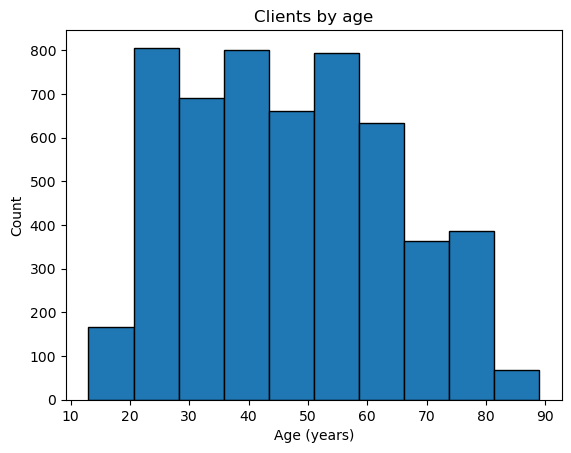

In [101]:
fig, ax = plt.subplots()
ax.hist(dfc["age"], bins=10, edgecolor="black")
ax.set_title("Clients by age")
ax.set_xlabel("Age (years)")
ax.set_ylabel("Count")
plt.show()

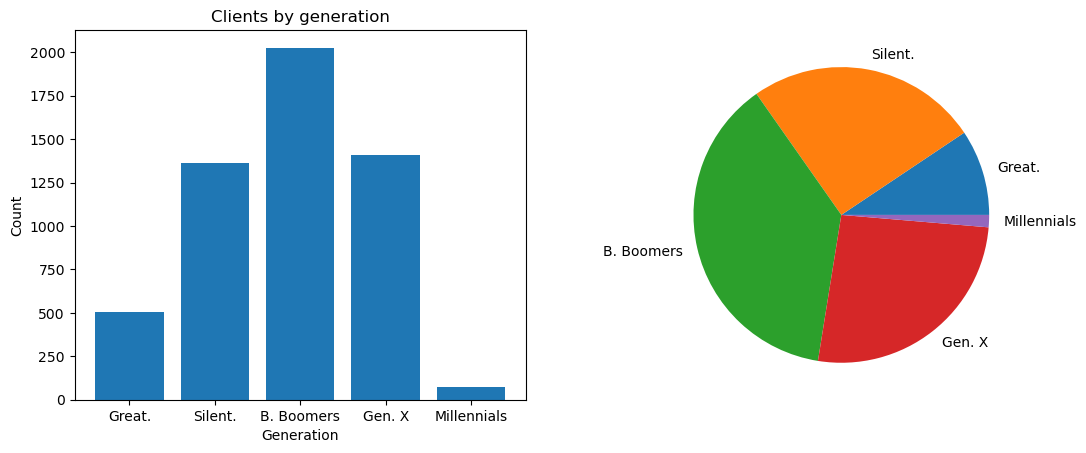

In [102]:
# https://en.wikipedia.org/wiki/Generation#Western_world
generations = {   
    1901: "Great.",
    1928: "Silent.",
    1946: "B. Boomers",
    1967: "Gen. X",
    1981: "Millennials",
    1997: "Gen. Z"
}

def get_generation(birth_year: int) -> str:
    year_after = max(y for y in generations.keys() if birth_year >= y)
    gen = generations[year_after]
    return gen

dfc["generation"] = dfc["birthDate"].dt.year.apply(get_generation)
bins = dfc.groupby("generation")["clientID"].count()
# order columns
labels = list(generations.values())
labels.pop()  # no gen.z in here
bins = bins[labels]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(fig.get_figwidth() * 2)

ax1.bar(bins.index, bins)
ax1.set_title("Clients by generation")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Count")

ax2.pie(bins, labels=bins.index)

plt.show()

In [104]:
con = sqlite3.connect(sqlf)
# can write justificaiton of why owner

client_loancount = pd.read_sql_query(
    "SELECT clientID, count(loanID) as loanCount FROM Loan JOIN Disposition ON Loan.dispID = Disposition.dispID WHERE Disposition.dispType = 'OWNER' GROUP BY clientID;",
    con    
)
client_orderscount = pd.read_sql_query(
    "SELECT clientID, count(orderID) as orderCount FROM StandingOrder JOIN Disposition ON StandingOrder.dispID = Disposition.dispID WHERE Disposition.dispType = 'OWNER' GROUP BY clientID;",
    con    
)
client_transcount = pd.read_sql_query(
    "SELECT clientID, count(transID) as transCount FROM BankTransaction JOIN Disposition ON BankTransaction.dispID = Disposition.dispID WHERE Disposition.dispType = 'OWNER' GROUP BY clientID;",
    con    
)
client_cardcount = pd.read_sql_query(
    "SELECT clientID, count(cardID) as cardCount FROM CreditCard JOIN Disposition ON CreditCard.dispID = Disposition.dispID WHERE Disposition.dispType = 'OWNER' GROUP BY clientID;",
    con    
)
con.close()

dfccounts = dfc.copy()
for countdf in (client_loancount, client_orderscount, client_transcount, client_cardcount):
    dfccounts = dfccounts.merge(countdf, how="left", on="clientID")
dfccounts

,clientID,cityID,birthDate,gender,age,generation,loanCount,orderCount,transCount,cardCount
0,1,18,1970-12-13,1,30,Gen. X,NaN,1.0,239.0,NaN
1,2,1,1945-02-04,0,55,Silent.,1.0,2.0,478.0,NaN
2,3,1,1940-10-09,1,60,Silent.,NaN,NaN,NaN,NaN
3,4,5,1956-12-01,0,44,B. Boomers,NaN,3.0,117.0,NaN
4,5,5,1960-07-03,1,40,B. Boomers,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5364,13955,1,1945-10-30,1,55,Silent.,1.0,2.0,304.0,NaN
5365,13956,1,1943-04-06,0,57,Silent.,NaN,NaN,NaN,NaN
5366,13968,61,1968-04-13,0,32,Gen. X,1.0,3.0,378.0,1.0
5367,13971,67,1962-10-19,1,38,B. Boomers,1.0,5.0,344.0,NaN


In [105]:
dfccounts.fillna(value=0, inplace=True)
dfccounts

,clientID,cityID,birthDate,gender,age,generation,loanCount,orderCount,transCount,cardCount
0,1,18,1970-12-13,1,30,Gen. X,0.0,1.0,239.0,0.0
1,2,1,1945-02-04,0,55,Silent.,1.0,2.0,478.0,0.0
2,3,1,1940-10-09,1,60,Silent.,0.0,0.0,0.0,0.0
3,4,5,1956-12-01,0,44,B. Boomers,0.0,3.0,117.0,0.0
4,5,5,1960-07-03,1,40,B. Boomers,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5364,13955,1,1945-10-30,1,55,Silent.,1.0,2.0,304.0,0.0
5365,13956,1,1943-04-06,0,57,Silent.,0.0,0.0,0.0,0.0
5366,13968,61,1968-04-13,0,32,Gen. X,1.0,3.0,378.0,1.0
5367,13971,67,1962-10-19,1,38,B. Boomers,1.0,5.0,344.0,0.0


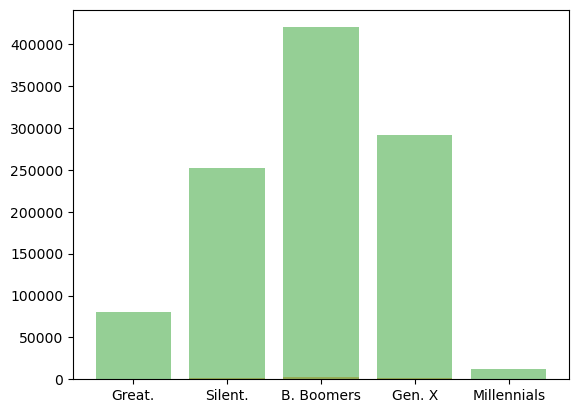

In [106]:
fig, ax = plt.subplots()

alpha = dict(alpha=0.5)

grouping = dfccounts.groupby("generation")
for col in ("loanCount", "orderCount", "transCount", "cardCount"):
    bins = grouping[col].sum()
    bins = bins[labels]  # order
    ax.bar(bins.index, bins, **alpha)

plt.show()

In [ ]:
# todo by city and inhabitants

### Loan risk modelling

In [36]:
# ok let's try this
# todo include whether they paid back loans in the past
# todo writeup rationale of included parameters
con = sqlite3.connect(sqlf)
df_risk = pd.read_sql_query("""
SELECT Loan.loanStatus, Loan.loanAmount, loan.loanDuration,
Client.birthDate, Account.creationDate,
City.inhabitants, City.ratioUrban, City.avgSalary, City.unemployment1995, City.unemployment1996, City.entrepeneurs, City.crimes1995, City.crimes1996
FROM ((((Loan
JOIN Disposition ON Loan.dispID = Disposition.dispID)
JOIN Client ON Disposition.clientID = Client.clientID)
JOIN Account ON Disposition.accountID =
Account.accountID)
JOIN City ON Client.cityID = City.cityID)
WHERE loanStatus IN ('A', 'B');""",
    con, parse_dates=["birthDate", "creationDate"]
)
con.close()
df_risk

,loanStatus,loanAmount,loanDuration,birthDate,creationDate,inhabitants,ratioUrban,avgSalary,unemployment1995,unemployment1996,entrepeneurs,crimes1995,crimes1996
0,A,80952,24,1945-02-04,1993-02-26,1204953,100.0,12541,0.29,0.43,167,85677.0,99107
1,B,30276,12,1939-04-23,1995-04-07,103347,67.0,9104,1.51,2.07,123,2299.0,2354
2,A,30276,12,1962-02-09,1996-07-28,228848,57.2,9893,4.09,4.72,96,5623.0,5887
3,A,165960,24,1944-06-13,1994-10-19,93931,56.9,8427,1.12,1.54,107,1874.0,1913
4,A,102876,12,1942-01-28,1996-05-05,323870,100.0,10673,4.75,5.44,100,18782.0,18347
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,A,44940,12,1976-01-20,1997-02-11,1204953,100.0,12541,0.29,0.43,167,85677.0,99107
230,A,89280,12,1947-11-14,1997-02-05,1204953,100.0,12541,0.29,0.43,167,85677.0,99107
231,A,52788,12,1973-02-16,1993-01-14,58796,51.9,9045,3.13,3.60,124,1845.0,1879
232,A,54024,12,1968-04-13,1994-10-01,117897,53.8,8814,4.76,5.74,107,2112.0,2059


In [37]:
df_risk.dropna(inplace=True)  # one or two empty unemployment fields
y = df_risk["loanStatus"].astype("category")
y = y.cat.codes  # 0 = paid off, 1 = not paid
y

0      0
1      1
2      0
3      0
4      0
      ..
229    0
230    0
231    0
232    0
233    0
Length: 232, dtype: int8

In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
# todo train test split
# todo add bank balance
X = df_risk.drop(columns=["loanStatus"])
X["birthDate"] = X["birthDate"].dt.year
X["creationDate"] = X["creationDate"].dt.year

X_train, X_test, y_train, y_test = train_test_split(X, y)

model_loan = LogisticRegression()
model_loan.fit(X=X_train, y=y_train)

LogisticRegression()

In [44]:
y_predict = model_loan.predict(X_test)
accuracy_score(y_test, y_predict)

0.9482758620689655

### Customer retention credit card hypothesis testing

In [140]:
con = sqlite3.connect(sqlf)

transaction_order_query = """SELECT * FROM
(SELECT clientID, transDate AS {col} FROM BankTransaction 
JOIN Disposition ON BankTransaction.dispID = Disposition.dispID ORDER BY julianday(transDate) {order})
GROUP BY clientID;"""
def read_first_last_transaction(order: str, col: str):
    return pd.read_sql_query(
        transaction_order_query.format(order=order, col=col),
        con,
        parse_dates=[col]
    )
first_transaction_df = read_first_last_transaction("ASC", "first")
last_transaction_df = read_first_last_transaction("DESC", "last")

client_card_df = pd.read_sql_query(
    """
SELECT Client.clientID, cardType FROM ((Client
JOIN Disposition ON Client.clientID = Disposition.clientID)
LEFT JOIN CreditCard ON Disposition.dispID = CreditCard.cardID);""",
    con
)
con.close()

dfcloyalty = dfc.copy()
dfcloyalty = dfcloyalty.merge(first_transaction_df, how="left", on="clientID")
dfcloyalty = dfcloyalty.merge(last_transaction_df, how="left", on="clientID")
dfcloyalty = dfcloyalty.merge(client_card_df, how="left", on="clientID")
dfcloyalty

,clientID,cityID,birthDate,gender,age,generation,first,last,cardType
0,1,18,1970-12-13,1,30,Gen. X,1995-03-24,1998-12-31,gold
1,2,1,1945-02-04,0,55,Silent.,1993-02-26,1998-12-31,classic
2,3,1,1940-10-09,1,60,Silent.,NaT,NaT,gold
3,4,5,1956-12-01,0,44,B. Boomers,1997-07-07,1998-12-31,classic
4,5,5,1960-07-03,1,40,B. Boomers,NaT,NaT,junior
...,...,...,...,...,...,...,...,...,...
5364,13955,1,1945-10-30,1,55,Silent.,1995-05-26,1998-12-31,None
5365,13956,1,1943-04-06,0,57,Silent.,NaT,NaT,None
5366,13968,61,1968-04-13,0,32,Gen. X,1994-10-01,1998-12-31,None
5367,13971,67,1962-10-19,1,38,B. Boomers,1995-10-14,1998-12-31,None


In [141]:
dfcloyalty["cardType"].fillna("none", inplace=True)
dfcloyalty.dropna(inplace=True)  # no transactions
dfcloyalty

,clientID,cityID,birthDate,gender,age,generation,first,last,cardType
0,1,18,1970-12-13,1,30,Gen. X,1995-03-24,1998-12-31,gold
1,2,1,1945-02-04,0,55,Silent.,1993-02-26,1998-12-31,classic
3,4,5,1956-12-01,0,44,B. Boomers,1997-07-07,1998-12-31,classic
5,6,12,1919-09-22,0,81,Great.,1996-02-21,1998-12-31,none
6,7,15,1929-01-25,0,71,Silent.,1997-05-30,1998-12-31,classic
...,...,...,...,...,...,...,...,...,...
5363,13931,8,1942-01-01,0,58,Silent.,1994-05-26,1998-12-31,none
5364,13955,1,1945-10-30,1,55,Silent.,1995-05-26,1998-12-31,none
5366,13968,61,1968-04-13,0,32,Gen. X,1994-10-01,1998-12-31,none
5367,13971,67,1962-10-19,1,38,B. Boomers,1995-10-14,1998-12-31,none


In [144]:
dfcloyalty["tenure"] = (dfcloyalty["last"] - dfcloyalty["first"]).dt.days
dfcloyalty

,clientID,cityID,birthDate,gender,age,generation,first,last,cardType,tenure
0,1,18,1970-12-13,1,30,Gen. X,1995-03-24,1998-12-31,gold,1378
1,2,1,1945-02-04,0,55,Silent.,1993-02-26,1998-12-31,classic,2134
3,4,5,1956-12-01,0,44,B. Boomers,1997-07-07,1998-12-31,classic,542
5,6,12,1919-09-22,0,81,Great.,1996-02-21,1998-12-31,none,1044
6,7,15,1929-01-25,0,71,Silent.,1997-05-30,1998-12-31,classic,580
...,...,...,...,...,...,...,...,...,...,...
5363,13931,8,1942-01-01,0,58,Silent.,1994-05-26,1998-12-31,none,1680
5364,13955,1,1945-10-30,1,55,Silent.,1995-05-26,1998-12-31,none,1315
5366,13968,61,1968-04-13,0,32,Gen. X,1994-10-01,1998-12-31,none,1552
5367,13971,67,1962-10-19,1,38,B. Boomers,1995-10-14,1998-12-31,none,1174


In [155]:
pop_tenure = dfcloyalty["tenure"]
pop_tenure_mean = pop_tenure.mean()
classic_tenure = dfcloyalty[dfcloyalty["cardType"] == "classic"]["tenure"]
gold_tenure = dfcloyalty[dfcloyalty["cardType"] == "gold"]["tenure"]

In [150]:
from scipy.stats import ttest_1samp, ttest_ind

In [156]:
# variable is average duration from first to last
# t test of pop against classic
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
# t test of classic against gold
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

# todo manual impl

print(ttest_1samp(classic_tenure, pop_tenure_mean))
print(ttest_1samp(gold_tenure, pop_tenure_mean))
print(ttest_ind(classic_tenure, gold_tenure))

TtestResult(statistic=-0.7305522542967215, pvalue=0.46538043792051254, df=522)
TtestResult(statistic=1.7804250623853868, pvalue=0.07954017543304774, df=67)
TtestResult(statistic=-1.814873827920415, pvalue=0.07005181261006051, df=589.0)


### Entrepreneurship regression

In [128]:
con = sqlite3.connect(sqlf)
dfe = pd.read_sql_query(
    """
SELECT City.cityID, City.entrepeneurs, City.cityName, City.inhabitants, 
count(loanID) AS cityLoans
FROM (((Loan
JOIN Disposition ON Loan.dispID = Disposition.dispID)
JOIN Client ON Disposition.clientID = Client.clientID)
JOIN City ON Client.cityID = City.cityID)
GROUP BY City.cityID;""",
    con
)
con.close()
dfe

,cityID,entrepeneurs,cityName,inhabitants,cityLoans
0,1,167,London,1204953,79
1,2,132,Worthing,88884,7
2,3,111,St Helens,75232,7
3,4,109,Stoke-on-Trent,149893,6
4,5,118,Gloucester,95616,11
...,...,...,...,...,...
72,73,90,Leeds,182027,8
73,74,100,Manchester,323870,20
74,75,99,Southampton,138032,3
75,76,107,Dudley,127369,6


In [124]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [119]:
x = dfe["entrepeneurs"].to_numpy()
X = x[:, np.newaxis]
y = dfe["cityLoans"]

model_ent = LinearRegression()
model_ent.fit(X=X, y=y)

LinearRegression()

model_ent.coef_[0] = 0.14493068745113924
model_ent.intercept_ = -7.973639054390741
Model accuracy: 0.06887721301779226


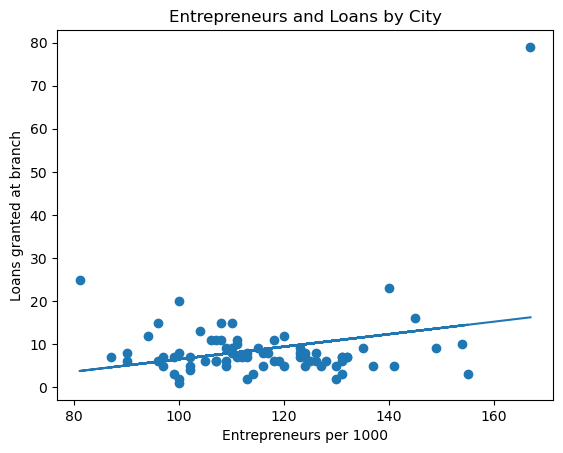

In [125]:
y_predict = model_ent.predict(X)
coef_determination = r2_score(y_true=y, y_pred=y_predict)

print(f"{model_ent.coef_[0] = }")
print(f"{model_ent.intercept_ = }")
print(f"Model accuracy: {coef_determination}")

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_title("Entrepreneurs and Loans by City")
ax.set_xlabel("Entrepreneurs per 1000")
ax.set_ylabel("Loans granted at branch")

ax.plot(x, y_predict)

plt.show()

In [129]:
# https://en.wikipedia.org/wiki/London
dfe.sort_values(by="cityLoans", axis=0, ascending=False).head()

,cityID,entrepeneurs,cityName,inhabitants,cityLoans
0,1,167,London,1204953,79
69,70,81,Glasgow,285387,25
53,54,140,Birmingham,387570,23
73,74,100,Manchester,323870,20
63,64,145,Liverpool,197099,16


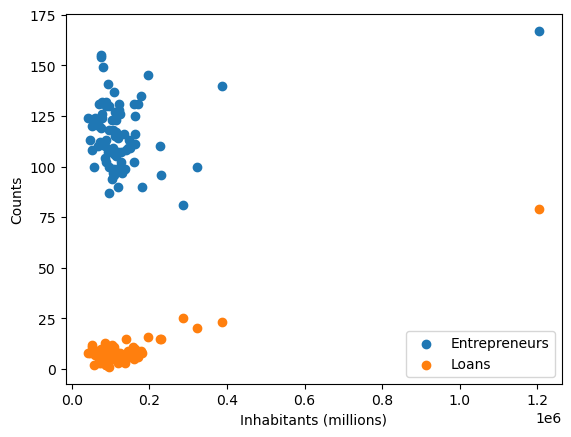

In [136]:
fig, ax = plt.subplots()

# it's probably with income or something

ax.scatter(dfe["inhabitants"], x, label="Entrepreneurs")
ax.scatter(dfe["inhabitants"], dfe["cityLoans"], label="Loans")

ax.set_xlabel("Inhabitants (millions)")
ax.set_ylabel("Counts")
ax.legend()

plt.show()

## Task 4: Experimental Results and Analysis (25 Marks)

Given the **five** modelling solutions implemented above, analyse, discuss and present your findings to the key stakeholders of the bank.

Your answer should clearly cover the following:
* Present your findings in a clear and concise manner;
* Discuss your results in the context of the selected solution;
* Discuss how these results can help the bank in performing customer risk assessment and establishing customer retention strategies;
* Present the limitations (if any) of your solutions in a clear and concise manner.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

<img src="think.jpg" alt="PowerPoint®" width=100>

what's the differenc emeant to be between this and the conclusion

In [ ]:
### Write your answer here (code cell(s) to be used, as appropriate)


----
----

## Task 5: Conclusion (10 Marks)

Given the insights derived from Tasks 1-4, provide a conclusion that clearly covers the following:
* A summary of the main points;
* A discussion of the significance of your results;
* Any recommendation(s) resulting from your analysis;
* Any overall ethical considerations arising from the data analysis of this business domain.

**World Limit**: 300 words.

**Write your answer here (text cell(s) to be used, as appropriate)**


In [ ]:
### Write your answer here (code cell(s) to be used, as appropriate)


----
----

## Overall Academic Quality (10 Marks)
10 marks are allocated for the clarity and cohesiveness of your answers (both text and code) across all tasks with appropriate, relevant and effective analysis and presentation of the results.

## Deliverables

You should submit the following to the submission point on the teaching portal:

1. the SQLite database produced in Task 2;
2. the completed Jupyter notebook (both .ipynb and HTML files) that also includes the SQL statements (Task 2), the research design and its implementation (Task 3), and the analysis and presentation of your results (Task 4);
3. any figures or diagrams that are included in your answers in the Jupyter notebook.

For each task where text is required, we have provided guidelines above on the suggested word counts. Exceeding the word count will result in any work beyond the word count being disregarded when assessing.